# NEEDED LIBRARIES

In [1]:
# import pandas as pd
# import numpy as np
# from numpy import mean
# from sklearn import tree
# from sklearn import preprocessing

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor

# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import KFold
# from sklearn.tree import export_graphviz
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import GridSearchCV
# import pydot
# import seaborn as sns
# import matplotlib.pyplot as plt
# from IPython.display import Image
# from io import StringIO
# from joblib import dump, load
# import pickle
# from sklearn.metrics import ConfusionMatrixDisplay

# from sklearn.ensemble import RandomForestRegressor
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import TimeSeriesSplit

import pandas as pd
import numpy as np
from sklearn import tree, preprocessing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO
from joblib import dump, load
import pickle


# 1. CORAZÓN DE MELÓN. CLASIFICACIÓN

In [2]:
heart = pd.read_csv('csv/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [122]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [123]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [124]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


/var/folders/30/kj50lt897c9gb579zv_k_5t00000gn/T/ipykernel_14031/2746878407.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart.corr(), square=True, annot=True, linewidths=1)


<Axes: >

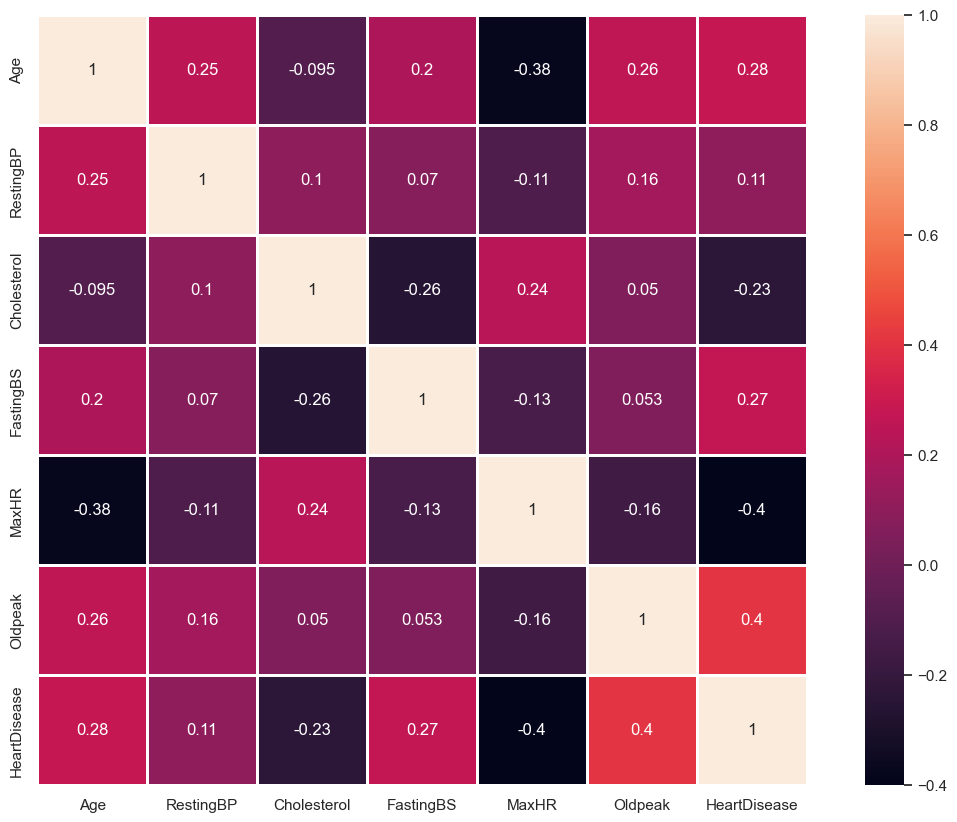

In [125]:
sns.set()
fig, ax = plt.subplots(figsize=(15,10))    
sns.heatmap(heart.corr(), square=True, annot=True, linewidths=1)

In [126]:
heart = heart.drop('RestingBP', axis=1)
heart = heart.drop('Cholesterol', axis=1)
heart = heart.drop('Age', axis=1) 

In [127]:
heart['HeartDisease'].replace({0: 'Normal', 1: 'HeartDisease'}, inplace=True)

le = preprocessing.LabelEncoder() 
heart['Sex'] = le.fit_transform(heart.Sex.values)
heart['ChestPainType'] = le.fit_transform(heart.ChestPainType.values)
heart['RestingECG'] = le.fit_transform(heart.RestingECG.values)
heart['ExerciseAngina'] = le.fit_transform(heart.ExerciseAngina.values)
heart['ST_Slope'] = le.fit_transform(heart.ST_Slope.values)

In [128]:
x_heart = heart.drop('HeartDisease', axis=1)
y_heart = heart['HeartDisease']

In [129]:
def cross_validation(model):
  results = []
  for train_fold, test_fold in kf.split(x_heart):
    x_heart_train = x_heart.iloc[train_fold]
    x_heart_test = x_heart.iloc[test_fold]
    y_heart_train = y_heart.iloc[train_fold]
    y_heart_test = y_heart.iloc[test_fold]

    model.fit(x_heart_train, y_heart_train)
    prediction = model.predict(x_heart_test)
    result = accuracy_score(y_heart_test, prediction)
    results.append(result)
  return np.mean(results)

In [130]:
kf = KFold(n_splits=6)
l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
total_scores_gini = []
total_scores_entropy = []
for estimators in l_estimators:
  fold_accuracy = []
  
  arbol = RandomForestClassifier(n_estimators=estimators, criterion='gini', random_state=0)
  total_scores_gini.append(cross_validation(arbol))
  
  arbol = RandomForestClassifier(n_estimators=estimators, criterion='entropy', random_state=0)
  total_scores_entropy.append(cross_validation(arbol))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


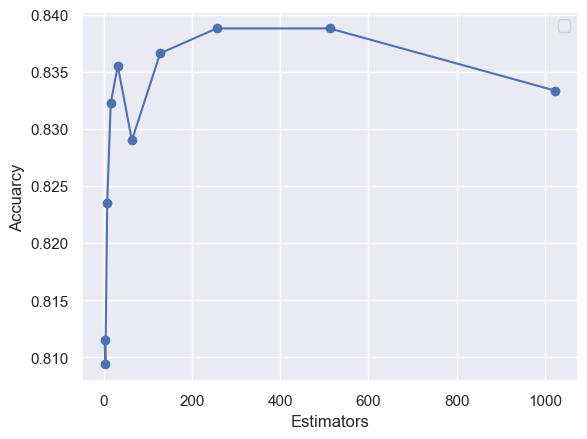

In [131]:
plt.plot(l_estimators, total_scores_gini, marker='o')
plt.ylabel('Accuarcy')
plt.xlabel('Estimators')
plt.legend()
plt.show()

In [132]:
best_est_gini = l_estimators[np.argmax(total_scores_gini)]
best_acc_gini = max(total_scores_gini)
print('Mejor estimador de gini:', best_est_gini)
print('Mejor resultado de gini:', best_acc_gini)

Mejor estimador de gini: 256
Mejor resultado de gini: 0.8387799564270152


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


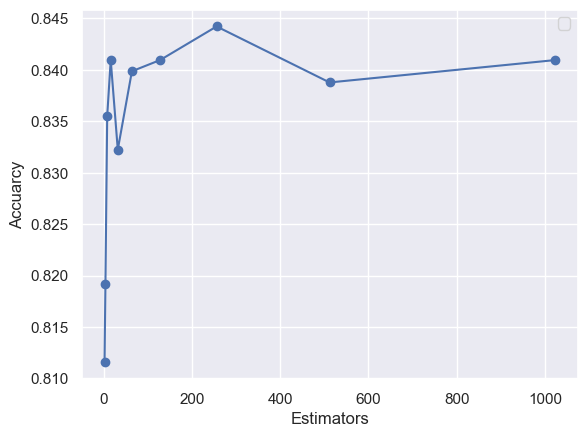

In [133]:
plt.plot(l_estimators, total_scores_entropy, marker='o')
plt.ylabel('Accuarcy')
plt.xlabel('Estimators')
plt.legend()
plt.show()

In [134]:
best_est_entropy = l_estimators[np.argmax(total_scores_entropy)]
best_acc_entropy = max(total_scores_entropy)
print('Mejor estimador de entropy:', best_est_entropy)
print('Mejor resultado de entropy:', best_acc_entropy)

Mejor estimador de entropy: 256
Mejor resultado de entropy: 0.8442265795206971


In [135]:
best_est = best_est_entropy if best_acc_entropy > best_acc_gini else best_est_gini
best_criterion = 'entropy' if best_acc_entropy > best_acc_gini else 'gini'
print('Mejor criterion:', best_criterion)

arbol =  RandomForestClassifier(n_estimators=best_est, criterion=best_criterion, random_state=0)

x_heart_train, x_heart_test, y_heart_train, y_heart_test = train_test_split(x_heart, y_heart, random_state=1, train_size=0.80)

arbol.fit(x_heart_train, y_heart_train)
prediction = arbol.predict(x_heart_test)


print('Precisión:', (accuracy_score(y_heart_test, prediction)*100),'%') 

Mejor criterion: entropy
Precisión: 85.86956521739131 %


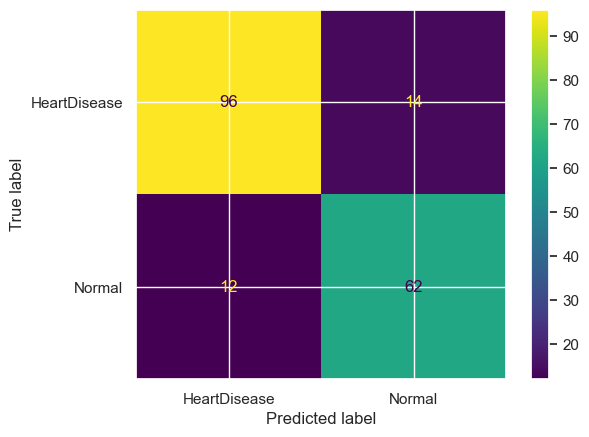

In [136]:
ConfusionMatrixDisplay.from_predictions(y_heart_test, prediction)

In [137]:
x_heart_train, x_heart_test, y_heart_train, y_heart_test = train_test_split(x_heart, y_heart, random_state=1, train_size=0.80)

# Reseteamos el índice para evitar errores
x_heart_train.reset_index(drop=True, inplace=True)
y_heart_train.reset_index(drop=True, inplace=True)

param_dist = {
    'n_estimators': [32, 64, 128, 256],
    'criterion': ['gini', 'entropy'],
    # 'max_features': ['auto', 'sqrt'],
    'max_depth': [8, 4, 2],
    'bootstrap': [True, False],
}

arbol = RandomForestClassifier(random_state=0)
grid = GridSearchCV(estimator=arbol, param_grid=param_dist, cv=4, n_jobs=-1)
grid.fit(x_heart_train, y_heart_train)
best_grid = grid.best_estimator_
best_grid

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=128,
                       random_state=0)

In [138]:
best_grid.fit(X=x_heart_train, y=y_heart_train)
prediction = best_grid.predict(x_heart_test)
print('Precisión:', (accuracy_score(y_heart_test, prediction)*100),'%') 

Precisión: 88.04347826086956 %


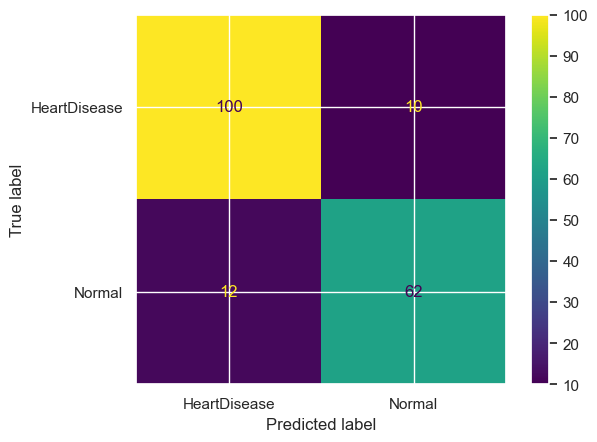

In [139]:
ConfusionMatrixDisplay.from_predictions(y_heart_test, prediction)

# 2. PRECIO DE LOS AGUACATES. REGRESIÓN

In [140]:
avocado = pd.read_csv('avocado.csv', index_col='Date')

In [141]:
avocado = avocado.drop(['Unnamed: 0'],  axis=1)

In [142]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


In [143]:
avocado['type'] = pd.factorize(avocado['type'])[0]
avocado['region'] = pd.factorize(avocado['region'])[0]
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53


In [144]:
avocado.head() 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [145]:
avocado.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


<Axes: >

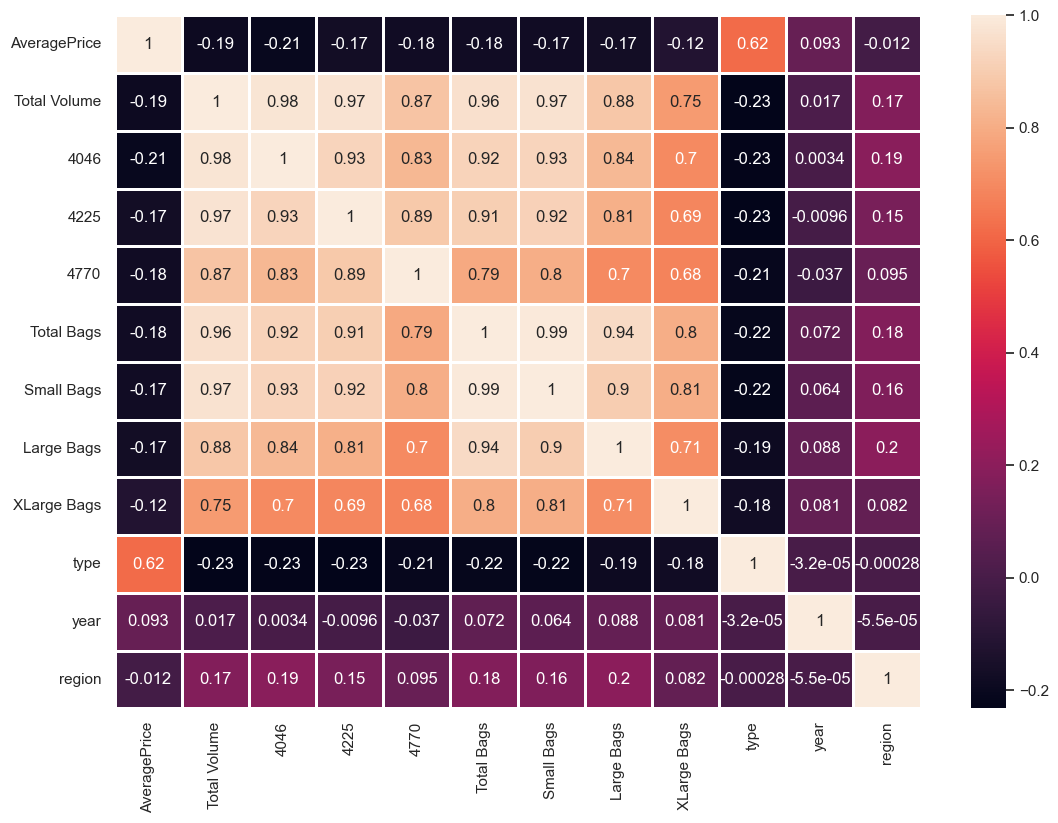

In [146]:
sns.set()
fig, ax = plt.subplots(figsize=(13,9))    
sns.heatmap(avocado.corr(), square=False, annot=True, linewidths=1)

In [147]:
avocado = avocado.drop('year', axis=1)

In [148]:
X = avocado.drop('AveragePrice', axis=1)
y = avocado['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# definimos los parámetros a ajustar y los valores posibles
param_grid = {
    'n_estimators': [2, 4, 8, 16, 32, 64],
    # 'n_estimators': [2, 4, 8, 16, 32, 64, 128],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# definimos la métrica de evaluación
scoring = 'neg_mean_absolute_error'

# definimos el modelo base
model = RandomForestRegressor(random_state=42)

# definimos la estrategia de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# realizamos la búsqueda de los mejores hiperparámetros
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=-1)
grid_result = grid.fit(X, y)

# imprimimos los resultados
print("Mejores parámetros: ", grid_result.best_params_)
print("MAE promedio en validación cruzada: {:.2f}".format(-grid_result.best_score_))

# entrenamos el modelo con los mejores hiperparámetros
best_model = grid_result.best_estimator_
best_model.fit(X, y)

# hacemos una predicción con el conjunto de prueba
y_pred = best_model.predict(X_test)

# evaluamos el desempeño del modelo en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
print('MAE en conjunto de prueba: {:.2f}'.format(mae))

Mejores parámetros:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 64}
MAE promedio en validación cruzada: 0.12
MAE en conjunto de prueba: 0.04


Feature ranking:
1. type (0.379355)
2. 4046 (0.114119)
3. Large Bags (0.108284)
4. 4225 (0.094846)
5. region (0.069323)
6. Total Volume (0.059124)
7. Small Bags (0.058968)
8. 4770 (0.051140)
9. Total Bags (0.039666)
10. XLarge Bags (0.025175)


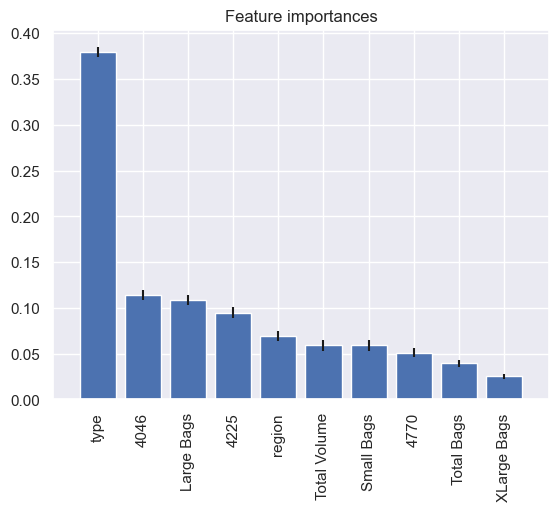

In [149]:
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [150]:
best_est = grid_result.best_params_['n_estimators']
best_depth = grid_result.best_params_['max_depth']
rf_model = RandomForestRegressor(n_estimators=best_est, max_depth=best_depth, random_state=0)
rf_model.fit(X_train, y_train)

# Hacer predicciones sobre datos nuevos (o datos de prueba)
y_pred = rf_model.predict(X_test)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 0.12092728054851984


/Users/aitor/Desktop/random_fores.nosync/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


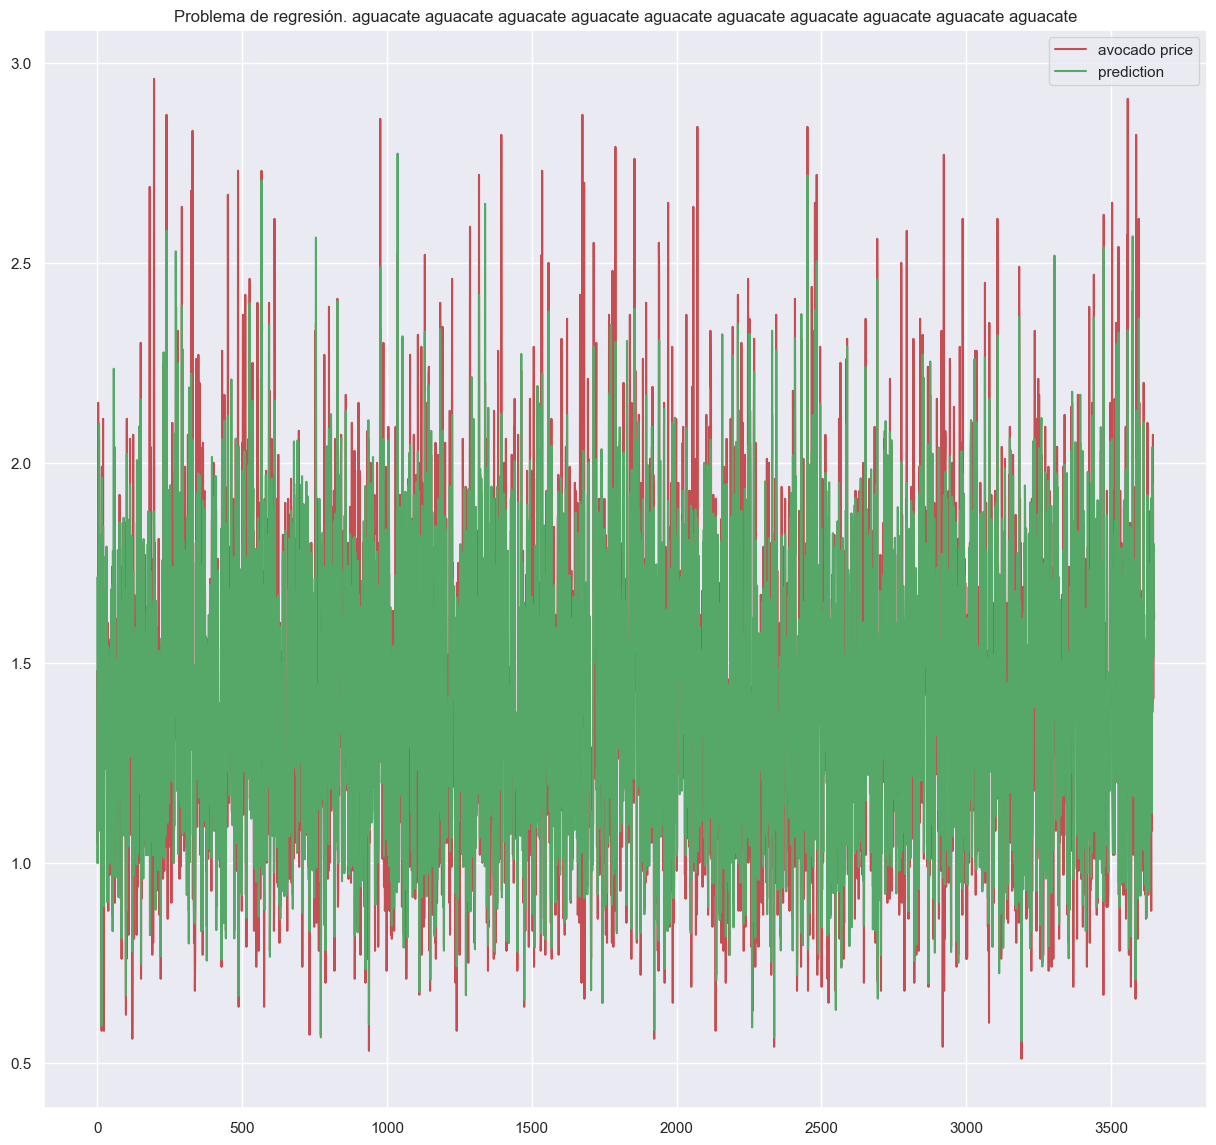

In [152]:
xx = np.stack(i for i in range (y_test.shape[0]))
fig, ax = plt.subplots(figsize=(15, 14))
ax.plot(xx, y_test, c='r', label='avocado price')
ax.plot(xx, y_pred, c='g', label='prediction')
ax.axis('tight')
ax.legend()
ax.set_title('Problema de regresión. aguacate aguacate aguacate aguacate aguacate aguacate aguacate aguacate aguacate aguacate')
plt.show()